# Mushroom Edibility Classification 

## Data Loading

In [2]:
# Importing dataset via kaggle

!kaggle datasets download -d devzohaib/mushroom-edibility-classification

Dataset URL: https://www.kaggle.com/datasets/devzohaib/mushroom-edibility-classification
License(s): CC-BY-NC-SA-4.0
100%|█████████████████████████████████████████| 510k/510k [00:01<00:00, 431kB/s]
100%|█████████████████████████████████████████| 510k/510k [00:01<00:00, 431kB/s]


In [3]:
# Exporting dataset from zipfile

import zipfile
zip_ref = zipfile.ZipFile('/home/bhxveshhh/ML/Mushroom Edibility Classification/mushroom-edibility-classification.zip', 'r')
zip_ref.extractall('/home/bhxveshhh/ML/Mushroom Edibility Classification')
zip_ref.close()

## Exploratory Data Analysis

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [38]:
df = pd.read_csv('secondary_data.csv', sep=";")

In [39]:
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [10]:
df.shape

(61069, 21)

In [11]:
df.size

1282449

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cap-diameter,61069.0,6.733854,5.264845,0.38,3.48,5.86,8.54,62.34
stem-height,61069.0,6.581538,3.370017,0.00,4.64,5.95,7.74,33.92
stem-width,61069.0,12.149410,10.035955,0.00,5.21,10.19,16.57,103.91


In [15]:
df.isnull().sum()

class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
dtype: int64

In [16]:
df.duplicated().sum()

np.int64(146)

In [17]:
df.nunique()

class                      2
cap-diameter            2571
cap-shape                  7
cap-surface               11
cap-color                 12
does-bruise-or-bleed       2
gill-attachment            7
gill-spacing               3
gill-color                12
stem-height             2226
stem-width              4630
stem-root                  5
stem-surface               8
stem-color                13
veil-type                  1
veil-color                 6
has-ring                   2
ring-type                  8
spore-print-color          7
habitat                    8
season                     4
dtype: int64

## Data Visualization

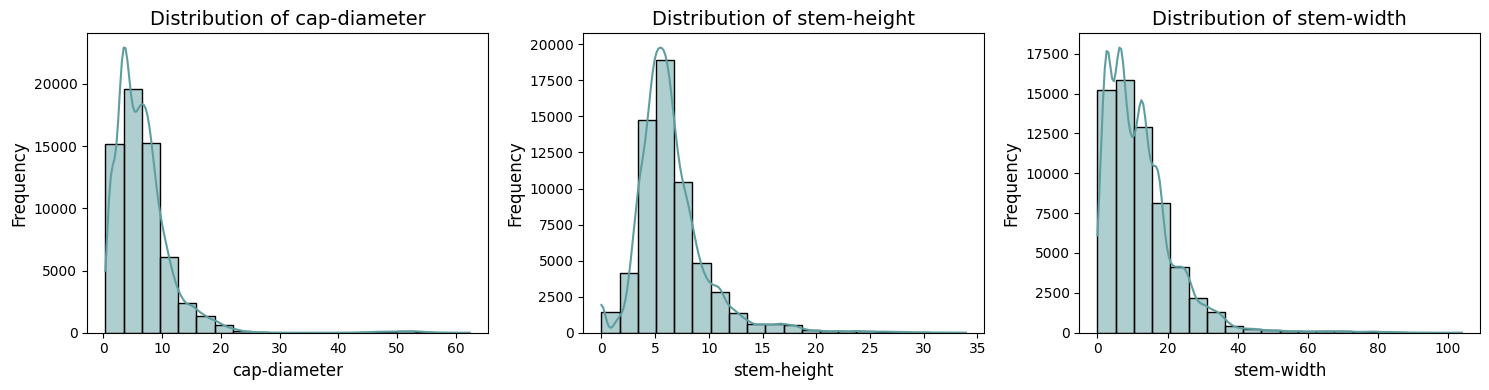

In [40]:
# Histograms for numerical columns

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()  

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=20, kde=True, color="cadetblue", edgecolor="black", ax=axes[i])
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12)
    axes[i].set_title(f"Distribution of {col}", fontsize=14)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

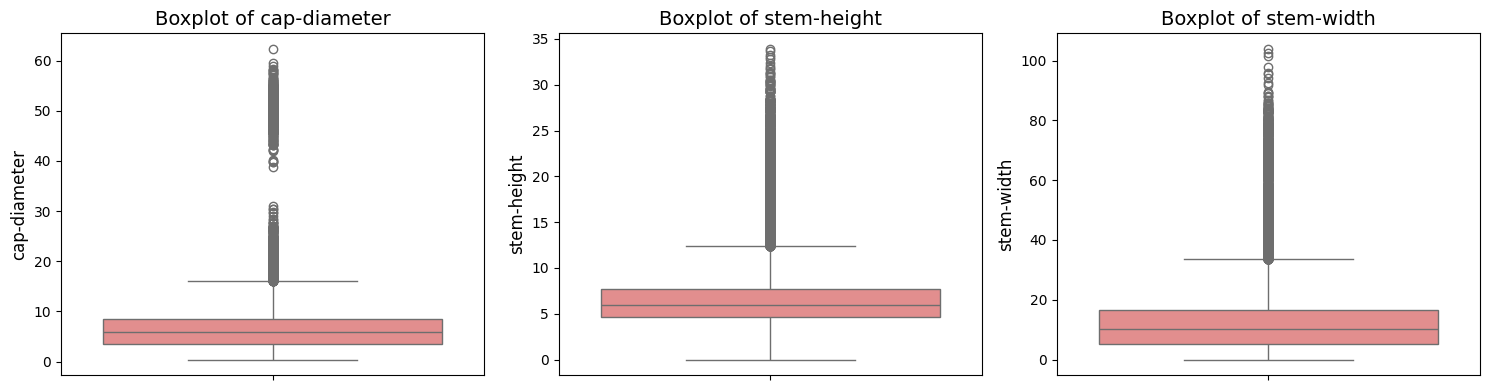

In [41]:
# Plotting each numerical column as a boxplot

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten() 

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], color="lightcoral", ax=axes[i])
    axes[i].set_ylabel(col, fontsize=12)
    axes[i].set_title(f"Boxplot of {col}", fontsize=14)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

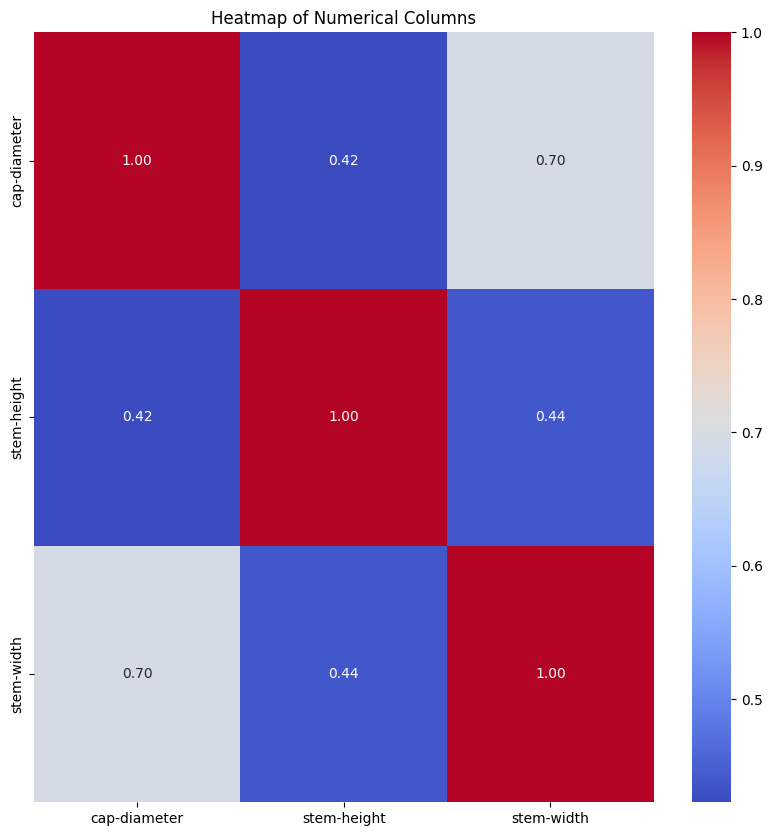

In [42]:
# Heatmap for numerical columns

numerical_columns = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 10))
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Numerical Columns')
plt.show()

## Data Preprocessing

In [26]:
# Dropping null values more than 50%

df.dropna(thresh=len(df) * 0.9, axis=1, inplace=True)

In [29]:
# Filling ring-type with mode 

df['ring-type'].fillna(df['ring-type'].mode()[0], inplace=True)

In [30]:
# Dropping duplicated rows

df.drop_duplicates(inplace=True)

In [31]:
# Label encoding

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in df.columns:
    df[col] = encoder.fit_transform(df[col].values)

In [32]:
X = df.drop('class', axis=1)
y = df['class']

In [33]:
# Train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Building

In [34]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [35]:
logistic_clf = LogisticRegression()
ridge_clf = RidgeClassifier()
xgboost_clf = XGBClassifier()
random_forest_clf = RandomForestClassifier()
ada_boost_clf = AdaBoostClassifier()
grad_boost_clf = GradientBoostingClassifier()
bagging_clf = BaggingClassifier()
decision_tree_clf = DecisionTreeClassifier()
svm_clf = SVC()

In [36]:
model_li = [logistic_clf, ridge_clf, xgboost_clf, random_forest_clf, 
            ada_boost_clf, grad_boost_clf, bagging_clf, decision_tree_clf, svm_clf]

scores = []
for model in model_li:
    model.fit(X_train, y_train)
    scores.append(accuracy_score(y_test, model.predict(X_test)))

print(scores)

[0.582382398817831, 0.619981939085461, 0.9944175355061161, 0.9968803874887119, 0.6558574829652738, 0.8727526475658813, 0.9930219193826451, 0.9877678351531073, 0.6755602988260405]


## Model Evaluation

Model: LogisticRegression
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.44      0.49      5440
           1       0.61      0.70      0.65      6741

    accuracy                           0.58     12181
   macro avg       0.57      0.57      0.57     12181
weighted avg       0.58      0.58      0.58     12181

Confusion Matrix:
 [[2399 3041]
 [2046 4695]]


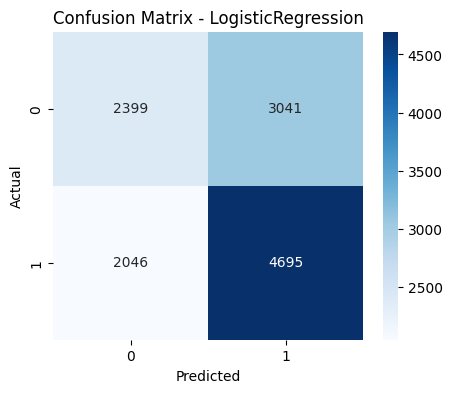

Model: RidgeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.44      0.51      5440
           1       0.63      0.76      0.69      6741

    accuracy                           0.62     12181
   macro avg       0.62      0.60      0.60     12181
weighted avg       0.62      0.62      0.61     12181

Confusion Matrix:
 [[2420 3020]
 [1609 5132]]


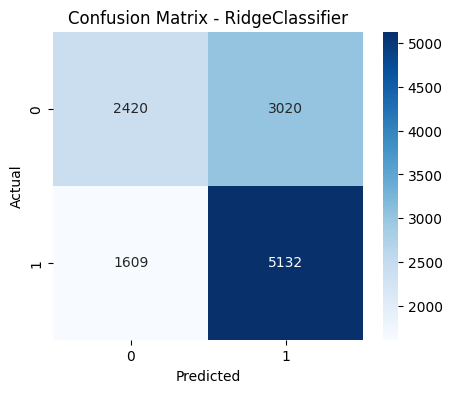

Model: XGBClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      5440
           1       1.00      0.99      0.99      6741

    accuracy                           0.99     12181
   macro avg       0.99      0.99      0.99     12181
weighted avg       0.99      0.99      0.99     12181

Confusion Matrix:
 [[5412   28]
 [  40 6701]]


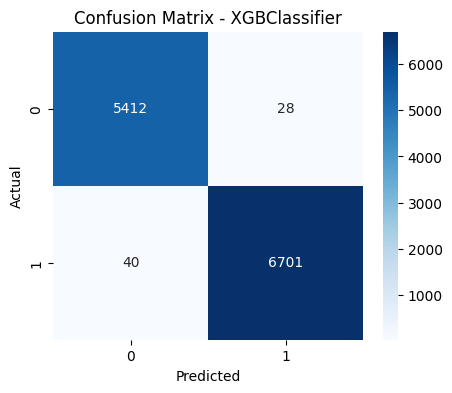

Model: RandomForestClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5440
           1       1.00      1.00      1.00      6741

    accuracy                           1.00     12181
   macro avg       1.00      1.00      1.00     12181
weighted avg       1.00      1.00      1.00     12181

Confusion Matrix:
 [[5423   17]
 [  17 6724]]


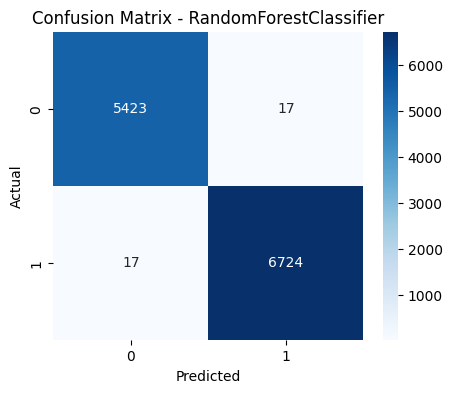

Model: AdaBoostClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.55      0.59      5440
           1       0.67      0.74      0.70      6741

    accuracy                           0.66     12181
   macro avg       0.65      0.65      0.65     12181
weighted avg       0.65      0.66      0.65     12181

Confusion Matrix:
 [[2998 2442]
 [1750 4991]]


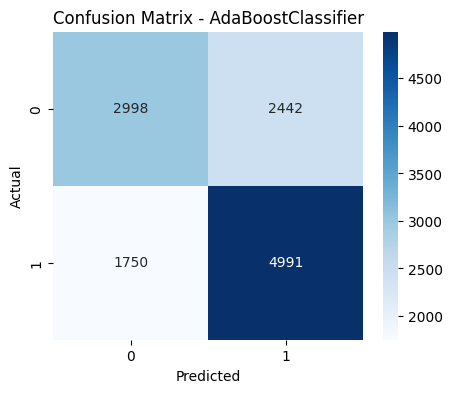

Model: GradientBoostingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86      5440
           1       0.88      0.89      0.89      6741

    accuracy                           0.87     12181
   macro avg       0.87      0.87      0.87     12181
weighted avg       0.87      0.87      0.87     12181

Confusion Matrix:
 [[4602  838]
 [ 712 6029]]


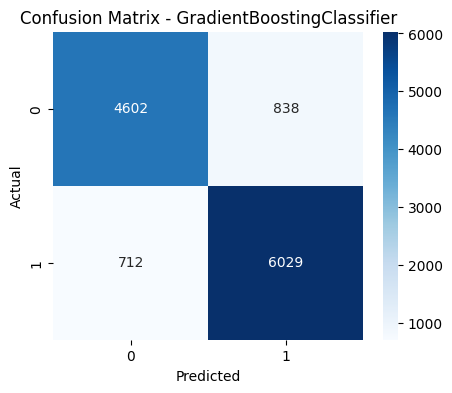

Model: BaggingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      5440
           1       0.99      0.99      0.99      6741

    accuracy                           0.99     12181
   macro avg       0.99      0.99      0.99     12181
weighted avg       0.99      0.99      0.99     12181

Confusion Matrix:
 [[5396   44]
 [  50 6691]]


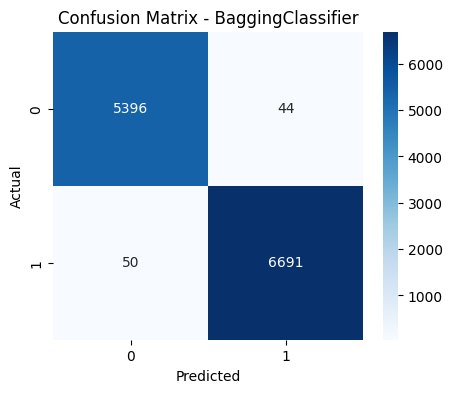

Model: DecisionTreeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      5440
           1       0.99      0.99      0.99      6741

    accuracy                           0.99     12181
   macro avg       0.99      0.99      0.99     12181
weighted avg       0.99      0.99      0.99     12181

Confusion Matrix:
 [[5361   79]
 [  69 6672]]


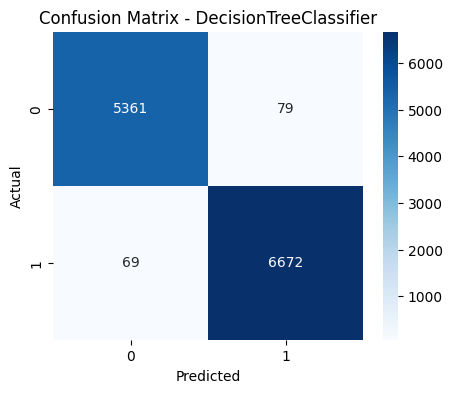

Model: SVC
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.51      0.59      5440
           1       0.67      0.81      0.73      6741

    accuracy                           0.68     12181
   macro avg       0.68      0.66      0.66     12181
weighted avg       0.68      0.68      0.67     12181

Confusion Matrix:
 [[2788 2652]
 [1300 5441]]


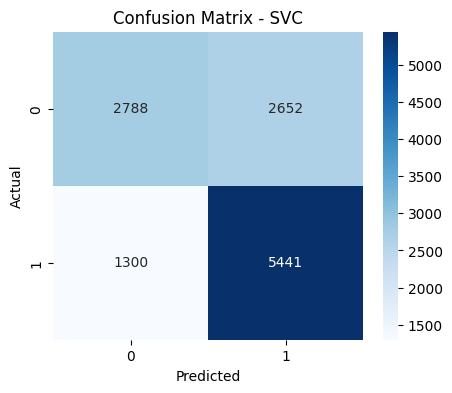

In [37]:
for model in model_li:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Model: {model.__class__.__name__}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Plot the confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model.__class__.__name__}")
    plt.show()